# Input-output properties cells

In [1]:
import os
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install bluepysnap

     |████████████████████████████████| 60 kB 1.8 MB/s 
     |████████████████████████████████| 2.5 MB 4.0 MB/s 
     |████████████████████████████████| 1.8 MB 31.9 MB/s 
     |████████████████████████████████| 1.5 MB 31.0 MB/s 
     |████████████████████████████████| 474 kB 58.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for bluepysnap: filename=bluepysnap-0.12.1-py3-none-any.whl size=75777 sha256=f1dd603475b5ebfcd2e7594b9e60ada9af78845e7cc158c55e71a662cb075838
  Stored in directory: /root/.cache/pip/wheels/dd/50/bb/b4399c5d522f56cdcbcb795bd660d3aae8fb49e8814ca6a711
  Created wheel for morph-tool: filename=morph_tool-2.9.0-py3-none-any.whl size=55271 sha256=226e1012d8fe64abc1d09fc6a9bf95fc54918bcb00586b8dd0a2830ecb05697c
  Stored in directory: /root/.cache/pip/wheels/31/f9/52/355e8f6a7aba18575732ae63ff1090784c8936ea269649f6b2
  Created whe

In [ ]:
!pip install neuron
!pip install netpyne

     |████████████████████████████████| 12.6 MB 217 kB/s 
     |████████████████████████████████| 312 kB 2.0 MB/s 


In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
CircuitPath = '/content/CA1_netpyne/info/data-bbp/20191017/'
BioName = CircuitPath + 'bioname/'
Atlas = CircuitPath + 'atlas/'
MorphologyPath = CircuitPath + 'morphologies/swc/'
CellLibraryFile = CircuitPath + 'sonata/nodes/nodes_hippocampus.h5'
METypePath = CircuitPath + 'emodels/20190402/hoc/'
MEComboInfoFile = CircuitPath + 'emodels/20190402/mecombo_emodel.tsv'
UserTargetFile = CircuitPath + 'user.target'
StartTargetFile = CircuitPath + 'start.target'

In [ ]:
cd /content/CA1_netpyne/info/data-bbp/20191017/

/content/CA1_netpyne/info/data-bbp/20191017


In [ ]:
from bluepysnap import Circuit
from bluepysnap.bbp import Cell
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]
cells_projections = circuit.nodes["hippocampus_projections"]
nodesinfo = cells.get()
nodesinfo_projections = cells_projections.get()

In [ ]:
nodesinfo[nodesinfo['mtype'] == 'SO_OLM']

,etype,layer,model_template,model_type,morph_class,morphology,mtype,region,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis,synapse_class,x,y,z,@dynamics:holding_current,@dynamics:threshold_current
18038,cAC,SO,hoc:CA1_int_cAC_011017HP2_2019032814552,biophysical,INT,011017HP2_height_15,SO_OLM,mc4;SO,-3.141593,-0.278184,-3.141593,INH,155.454900,122.981872,888.681658,-0.045443,0.292969
18039,cAC,SO,hoc:CA1_int_cAC_011017HP2_2019032814552,biophysical,INT,011017HP2_height_150,SO_OLM,mc5;SO,-0.000000,1.511316,-0.000000,INH,399.040890,5.274382,1126.319073,-0.045443,0.292969
18040,cAC,SO,hoc:CA1_int_cAC_011017HP2_2019032814552,biophysical,INT,011017HP2_height_150,SO_OLM,mc3;SO,-3.141593,-0.036900,-3.141593,INH,708.144090,56.298760,547.607180,-0.045443,0.292969
18041,cAC,SO,hoc:CA1_int_cAC_011017HP2_2019032814552,biophysical,INT,011017HP2,SO_OLM,mc5;SO,-0.000000,0.160389,-0.000000,INH,389.542873,64.128969,1194.040136,-0.045443,0.292969
18042,cAC,SO,hoc:CA1_int_cAC_011017HP2_2019032814552,biophysical,INT,011017HP2,SO_OLM,mc3;SO,-0.000000,0.066779,-0.000000,INH,749.955623,82.504618,229.293817,-0.045443,0.292969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18121,cAC,SO,hoc:CA1_int_cAC_011017HP2_2019032814552,biophysical,INT,011017HP2_height_15,SO_OLM,mc6;SO,-3.141593,-0.693980,-3.141593,INH,778.957044,166.642150,848.857523,-0.045443,0.292969
18122,cAC,SO,hoc:CA1_int_cAC_011017HP2_2019032814552,biophysical,INT,011017HP2_height_150,SO_OLM,mc4;SO,-0.000000,0.763293,-0.000000,INH,-84.140585,43.955751,702.858575,-0.045443,0.292969
18123,cAC,SO,hoc:CA1_int_cAC_011017HP2_2019032814552,biophysical,INT,011017HP2_height_15,SO_OLM,mc4;SO,0.000000,-0.261246,0.000000,INH,-87.055036,146.738908,802.859823,-0.045443,0.292969
18124,cAC,SO,hoc:CA1_int_cAC_011017HP2_2019032814552,biophysical,INT,011017HP2_height_150,SO_OLM,mc1;SO,-3.141593,1.447884,-3.141593,INH,2.936487,27.242508,442.872543,-0.045443,0.292969


In [ ]:
cd /content/CA1_netpyne/sim

/content/CA1_netpyne/sim


In [ ]:
!nrnivmodl mod/

/content/CA1_netpyne/sim
Mod files: "mod/cacummb.mod" "mod/cacumm.mod" "mod/cagk.mod" "mod/cal2.mod" "mod/can2.mod" "mod/cat.mod" "mod/DetAMPANMDA.mod" "mod/DetGABAAB.mod" "mod/h.mod" "mod/kadist.mod" "mod/kaprox.mod" "mod/kca.mod" "mod/kd2.mod" "mod/kdb.mod" "mod/kdrbca1.mod" "mod/kdrca1.mod" "mod/kmb.mod" "mod/na3n.mod" "mod/naxn.mod" "mod/ProbAMPANMDA_EMS.mod" "mod/ProbGABAAB_EMS.mod"

Creating x86_64 directory for .o files.

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.7/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 -> NMODL ../mod//cacummb.mod
(cd "../mod"; MODLUNIT=/usr/local/lib/python3.7/dist-packages/neuron/.data/share/nrn/lib/nrnunits.lib /usr/local/lib/python3.7/dist-packages/neuron/.data/bin/nocmodl cacummb.mod -o "/content/CA1_netpyne/sim/x86_64")
 -> NMODL ../mod//cacumm.mod
(cd "../mod"; MODLUNIT=/usr/local/lib/python3.7/dist-packages/neuron/.data/share/nrn/lib/nrnunits.li

# Exploring the Lists

In [ ]:
hoclist = list(cells.property_values(Cell.MODEL_TEMPLATE))
Morpholist = list(cells.property_values(Cell.MORPHOLOGY))
Mtypelist = list(cells.property_values(Cell.MTYPE))

In [ ]:
Mtypelist

['SO_OLM',
 'SP_PVBC',
 'SLM_PPA',
 'SO_BP',
 'SP_CCKBC',
 'SP_Ivy',
 'SP_BS',
 'SO_Tri',
 'SO_BS',
 'SP_PC',
 'SR_SCA',
 'SP_AA']

# NetPyNE

In [ ]:
%matplotlib inline

In [ ]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [ ]:
%matplotlib inline

In [ ]:
gid = 18041
MorphoName = nodesinfo['morphology'][gid] + '.swc'
hocName = nodesinfo['model_template'][gid][4:]  
mcName = nodesinfo['region'][gid][:3]  
Mtype = nodesinfo['mtype'][gid]
cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]
MEName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid]
MorphohocName = nodesinfo['morphology'][gid] + '__' + nodesinfo['model_template'][gid][4:]    

print('%s \n %d %s %s \n hoc = %s \n swc = %s' % (cellName,gid,mcName,Mtype,hocName,MorphoName))

SO_OLM_cAC_mc5 
 18041 mc5 SO_OLM 
 hoc = CA1_int_cAC_011017HP2_2019032814552 
 swc = 011017HP2.swc


In [ ]:
gid = 14000
MorphoName = nodesinfo['morphology'][gid] + '.swc'
hocName = nodesinfo['model_template'][gid][4:]  
mcName = nodesinfo['region'][gid][:3]  
Mtype = nodesinfo['mtype'][gid]
cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]
MEName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid]
MorphohocName = nodesinfo['morphology'][gid] + '__' + nodesinfo['model_template'][gid][4:]    

print('%s \n %d %s %s \n hoc = %s \n swc = %s' % (cellName,gid,mcName,Mtype,hocName,MorphoName))

SP_PC_cACpyr_mc1 
 14000 mc1 SP_PC 
 hoc = CA1_pyr_cACpyr_mpg141216_A_idA_2019030513333 
 swc = dend-oh140521_B0_Rat_idC_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.900_z1.000_-_Clone_9.swc


In [ ]:
for gid in [14000,18041]:
    MorphoName = nodesinfo['morphology'][gid] + '.swc'
    hocName = nodesinfo['model_template'][gid][4:]  
    if cellName == nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]:
        cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_2'
    else:  
        cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]
    
    cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
        conds={'cellType': cellName, 'cellModel': 'HH_full'},
        fileName='/content/CA1_netpyne/scripts/cellwrapper.py',
        cellName='loadCell',
        cellInstance = True,
        cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
    netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')

In [ ]:
# netParams.cellParams[cellName]
netParams.cellParams.keys()

odict_keys(['SP_PC_cACpyr_mc1_2', 'SO_OLM_cAC_mc5'])

In [ ]:
netParams.popParams['SP_PC_cACpyr'] = {'cellType': 'SP_PC_cACpyr_mc1_2', 'numCells': 1, 'cellModel': 'HH_full'}
netParams.popParams['SO_OLM_cAC'] = {'cellType': 'SO_OLM_cAC_mc5', 'numCells': 1, 'cellModel': 'HH_full'}

## LOAD PHYS FROM FILES

In [ ]:
for pre in Mtypelist:
    for post in Mtypelist:
        proj = '%s:%s' % (pre,post)

        print(proj+',')

SO_OLM:SO_OLM,
SO_OLM:SP_PVBC,
SO_OLM:SLM_PPA,
SO_OLM:SO_BP,
SO_OLM:SP_CCKBC,
SO_OLM:SP_Ivy,
SO_OLM:SP_BS,
SO_OLM:SO_Tri,
SO_OLM:SO_BS,
SO_OLM:SP_PC,
SO_OLM:SR_SCA,
SO_OLM:SP_AA,
SP_PVBC:SO_OLM,
SP_PVBC:SP_PVBC,
SP_PVBC:SLM_PPA,
SP_PVBC:SO_BP,
SP_PVBC:SP_CCKBC,
SP_PVBC:SP_Ivy,
SP_PVBC:SP_BS,
SP_PVBC:SO_Tri,
SP_PVBC:SO_BS,
SP_PVBC:SP_PC,
SP_PVBC:SR_SCA,
SP_PVBC:SP_AA,
SLM_PPA:SO_OLM,
SLM_PPA:SP_PVBC,
SLM_PPA:SLM_PPA,
SLM_PPA:SO_BP,
SLM_PPA:SP_CCKBC,
SLM_PPA:SP_Ivy,
SLM_PPA:SP_BS,
SLM_PPA:SO_Tri,
SLM_PPA:SO_BS,
SLM_PPA:SP_PC,
SLM_PPA:SR_SCA,
SLM_PPA:SP_AA,
SO_BP:SO_OLM,
SO_BP:SP_PVBC,
SO_BP:SLM_PPA,
SO_BP:SO_BP,
SO_BP:SP_CCKBC,
SO_BP:SP_Ivy,
SO_BP:SP_BS,
SO_BP:SO_Tri,
SO_BP:SO_BS,
SO_BP:SP_PC,
SO_BP:SR_SCA,
SO_BP:SP_AA,
SP_CCKBC:SO_OLM,
SP_CCKBC:SP_PVBC,
SP_CCKBC:SLM_PPA,
SP_CCKBC:SO_BP,
SP_CCKBC:SP_CCKBC,
SP_CCKBC:SP_Ivy,
SP_CCKBC:SP_BS,
SP_CCKBC:SO_Tri,
SP_CCKBC:SO_BS,
SP_CCKBC:SP_PC,
SP_CCKBC:SR_SCA,
SP_CCKBC:SP_AA,
SP_Ivy:SO_OLM,
SP_Ivy:SP_PVBC,
SP_Ivy:SLM_PPA,
SP_Ivy:SO_BP,
SP_Ivy:S

In [ ]:
Epops = pd.unique(nodesinfo[nodesinfo['synapse_class'] == 'EXC']['mtype'])

In [ ]:
Ipops = pd.unique(nodesinfo[nodesinfo['synapse_class'] == 'INH']['mtype'])

#Tratamento dos dados

In [ ]:
syndata_exc = pd.read_csv('/content/syndata_exc.csv')
syndata_exc

,connType,tau_r_AMPA,tau_d_AMPA,std_tau_d_AMPA,tau_r_NMDA,tau_d_NMDA,std_tau_d_NMDA,Use,Use_std,Dep,Dep_std,Fac,Fac_std,gmax,NMDA_ratio
0,SP_PC:SP_BS,0.50,4.12,NaN,NaN,148.50,0.09,0.23,0.09,410.0,11.0,10.0,0.10,1.65,0.28
1,SP_PC:SP_CCKBC,0.50,4.12,NaN,NaN,298.75,0.09,0.23,0.09,410.0,11.0,10.0,0.40,3.50,0.86
2,SP_PC:SP_Ivy,0.50,4.12,NaN,NaN,NaN,NaN,NaN,0.02,617.0,5.0,17.0,0.40,2.30,NaN
3,SP_PC:SP_PVBC,0.50,4.12,NaN,NaN,NaN,NaN,NaN,0.09,410.0,11.0,10.0,0.05,2.00,NaN
4,SP_PC:SO_Tri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SP_PC:SLM_PPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SP_PC:SO_BP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SP_PC:SR_SCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,SP_PC:SP_AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SP_PC:SP_PC,0.02,3.00,NaN,NaN,148.50,0.02,0.50,0.02,671.0,5.0,17.0,0.10,0.60,1.22


**Conversão da unidade do gmax:**

In [ ]:
#Weight conversion factor (from nS to uS)
syndata_exc['gmax'] = syndata_exc['gmax']*0.001

**Parâmetros Excitatórios:**

In [ ]:
exc_parameters = ['tau_r_AMPA', 'tau_d_AMPA', 'tau_r_NMDA', 'tau_d_NMDA', 'Use', 'Dep', 'Fac', 'gmax', 'NMDA_ratio']
exc_values = [0.2, 1.7, 9.0, 61.0, 1.0, 100, 10, 0.001, 1.22]

In [ ]:
index = 0

for exc_parameter in exc_parameters:
  syndata_exc[exc_parameter] = syndata_exc[exc_parameter].fillna(exc_values[index])
  index = index + 1

In [ ]:
#syndata_exc = syndata_exc[exc_parameters]
#syndata_exc

In [ ]:
for pre in Epops:
    for post in Mtypelist:
        proj = '%s:%s' % (pre, post)

        syndata_proj = syndata_exc[syndata_exc['connType'] == proj]


        netParams.synMechParams[proj] = {'mod': 'DetAMPANMDA',
                                         'tau_r_AMPA': float(syndata_proj['tau_r_AMPA']), 
                                         'tau_d_AMPA': float(syndata_proj['tau_d_AMPA']), 
                                         'tau_r_NMDA': float(syndata_proj['tau_r_NMDA']), 
                                         'tau_d_NMDA': float(syndata_proj['tau_d_NMDA']), 
                                         'Use': float(syndata_proj['Use']), 
                                         'Dep': float(syndata_proj['Dep']), 
                                         'Fac': float(syndata_proj['Fac']), 
                                         #'gmax': float(syndata_proj['gmax']), 
                                         'NMDA_ratio': float(syndata_proj['NMDA_ratio'])}

In [ ]:
netParams.synMechParams['SP_PC:SO_OLM']

{'Dep': 138.0,
 'Fac': 670.0,
 'NMDA_ratio': 0.28,
 'Use': 0.09,
 'mod': 'DetAMPANMDA',
 'tau_d_AMPA': 1.7,
 'tau_d_NMDA': 148.5,
 'tau_r_AMPA': 0.14,
 'tau_r_NMDA': 9.0}

**Parâmetros Inibitórios:**

In [ ]:
syndata_inh = pd.read_csv('/content/syndata_inh.csv')
syndata_inh

,connType,tau_d_GABAA,tau_d_GABAA_std,Use,Use_std,Dep,Dep_std,Fac,Fac_std,gmax,gmax_std,Nrrp,s_type,type
0,SP_BS:SP_BS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SP_BS:SP_CCKBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP_BS:SP_Ivy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SP_BS:SP_PVBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SP_BS:SO_Tri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,SO_OLM:SR_SCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,SO_OLM:SP_AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,SO_OLM:SP_PC,8.3,2.2,0.3,0.08,1250.0,520.0,2.0,4.0,1.4,0.3,1.0,I2,IE
130,SO_OLM:SO_BS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Weight conversion factor (from nS to uS)
syndata_inh['gmax'] = syndata_inh['gmax']*0.001

In [ ]:
inh_parameters =  ['tau_d_GABAA', 'Use', 'Dep', 'Fac', 'gmax']
inh_values = [8, 1.0, 100, 10, 0.001]

In [ ]:
index = 0

for inh_parameter in inh_parameters:
  syndata_inh[inh_parameter] = syndata_inh[inh_parameter].fillna(inh_values[index])
  index = index + 1

In [ ]:
for pre in Ipops:
    for post in Mtypelist:
        proj = '%s:%s' % (pre, post)

        syndata_proj = syndata_inh[syndata_inh['connType'] == proj]


        netParams.synMechParams[proj] = {'mod': 'DetGABAAB',
                                         'tau_d_GABAA': float(syndata_proj['tau_d_GABAA']), #MEXER AQUI
                                         'Use': float(syndata_proj['Use']), 
                                         'Dep': float(syndata_proj['Dep']), 
                                         'Fac': float(syndata_proj['Fac']) 
                                         #'gmax': float(syndata_proj['gmax'])
                                         }

In [ ]:
netParams.synMechParams['OLM_PC']={'mod':'DetGABAAB', 
                                   'tau_d_GABAA':8.3, 'e_GABAA':-75.0,
                                   'Use': 0.3, 
                                   'Dep': 1250.0, 
                                   'Fac': 2, 'GABAB_ratio': 0} 

In [ ]:
netParams.synMechParams['OLM_PC']

{'Dep': 1250.0,
 'Fac': 2,
 'GABAB_ratio': 0,
 'Use': 0.3,
 'e_GABAA': -75.0,
 'mod': 'DetGABAAB',
 'tau_d_GABAA': 8.3}

In [ ]:
netParams.synMechParams['SO_OLM:SP_PC']

{'Dep': 1250.0,
 'Fac': 2.0,
 'Use': 0.3,
 'mod': 'DetGABAAB.mod',
 'tau_d_GABAA': 8.3}

#Network

In [ ]:
#------------------------------------------------------------------------------
#	NETWORK CONNECTIONS	
#------------------------------------------------------------------------------

##EXC
#for pre in ['SP_PC_cACpyr']:
#	for post in ['SO_OLM_cAC']:
#		netParams.connParams[pre + '->' + post] = {
#			'preConds': {'pop': pre},
#			'postConds': {'pop': post},
#			# 'sec': postsynDict[postsynList[i]],
#			'synsPerConn': 2,
#			'synMech': 'SP_PC:SO_OLM',
#			'weight': 1.5,
#			'delay': 0.5
#			}
#		if post=='SP_PC_cACpyr_mc2_0':
#			netParams.connParams[pre + '->' + post]['synMech'] = 'SP_PC:SP_PC'

##INH
for pre in ['SO_OLM_cAC']:
	for post in ['SP_PC_cACpyr']:
		netParams.connParams[pre + '->' + post] = {
			'preConds': {'pop': pre},
			'postConds': {'pop': post},
			# 'sec': postsynDict[postsynList[i]],
			'synsPerConn': 8,
			'synMech': 'SO_OLM:SP_PC',
			'weight': 1.5,
			'delay': 0.5
			}

In [ ]:
# Options
durationstim = 800.0
delaystim = 100.0
timesimulation = 1000.0
ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
step_number = 6
netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': ampstim[step_number]}

netParams.stimTargetParams['Input->all'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':'SO_OLM_cAC'}}

In [ ]:
## cfg  
cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = timesimulation 						            # Duration of the simulation, in ms
cfg.dt = 0.01								                # Internal integration timestep to use
cfg.verbose = False							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.01 			
cfg.filename = 'model_inh'  			# Set file output name
cfg.saveJson = False
cfg.analysis['plotTraces'] = {'include': [0, 1], 'timeRange': [0,1000], 'saveFig': True, 'showFig': True, 'figSize':(12,4)} # , 'ylim': [-90,30] Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre': [0, 1],'includePre': [0, 1], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}
cfg.hParams['celsius'] = 34.0

In [ ]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations


Start time:  2021-09-15 16:16:59.221758


ODict([('SP_PC_cACpyr', <netpyne.network.pop.Pop at 0x7fe3be13ead0>),
       ('SO_OLM_cAC', <netpyne.network.pop.Pop at 0x7fe3be13e750>)])

In [ ]:
sim.net.createCells()              			# instantiate network cells based on defined populations


Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 2 
  Done; cell creation time = 0.32 s.


[compartCell_SP_PC_cACpyr_mc1_2_HH_full_0,
 compartCell_SO_OLM_cAC_mc5_HH_full_1]

In [ ]:
sim.net.connectCells()            			# create connections between cells based on params

Making connections...
  Number of connections on node 0: 1 
  Number of synaptic contacts on node 0: 8 
  Done; cell connection time = 0.00 s.


[[{preGid: 1, sec: 'soma', loc: 0.0625, synMech: 'SO_OLM:SP_PC', weight: 1.5, delay: 0.5, label: 'SO_OLM_cAC->SP_PC_cACpyr', hObj: NetCon[0]},
  {preGid: 1, sec: 'soma', loc: 0.1875, synMech: 'SO_OLM:SP_PC', weight: 1.5, delay: 0.5, label: 'SO_OLM_cAC->SP_PC_cACpyr', hObj: NetCon[1]},
  {preGid: 1, sec: 'soma', loc: 0.3125, synMech: 'SO_OLM:SP_PC', weight: 1.5, delay: 0.5, label: 'SO_OLM_cAC->SP_PC_cACpyr', hObj: NetCon[2]},
  {preGid: 1, sec: 'soma', loc: 0.4375, synMech: 'SO_OLM:SP_PC', weight: 1.5, delay: 0.5, label: 'SO_OLM_cAC->SP_PC_cACpyr', hObj: NetCon[3]},
  {preGid: 1, sec: 'soma', loc: 0.5625, synMech: 'SO_OLM:SP_PC', weight: 1.5, delay: 0.5, label: 'SO_OLM_cAC->SP_PC_cACpyr', hObj: NetCon[4]},
  {preGid: 1, sec: 'soma', loc: 0.6875, synMech: 'SO_OLM:SP_PC', weight: 1.5, delay: 0.5, label: 'SO_OLM_cAC->SP_PC_cACpyr', hObj: NetCon[5]},
  {preGid: 1, sec: 'soma', loc: 0.8125, synMech: 'SO_OLM:SP_PC', weight: 1.5, delay: 0.5, label: 'SO_OLM_cAC->SP_PC_cACpyr', hObj: NetCon[6]},

In [ ]:
sim.net.addStims() 							# add network stimulation

Adding stims...
  Number of stims on node 0: 1 
  Done; cell stims creation time = 0.00 s.


[[],
 [{label: 'Input->all', source: 'Input', sec: 'soma', loc: 0.5, type: 'IClamp', del: 100.0, dur: 800.0, amp: 0.8, hObj: IClamp[0]}]]

In [ ]:
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)

Recording 2 traces of 1 types on node 0


{spkt: Vector[22106], spkid: Vector[22107], V_soma: {cell_0: Vector[22108], cell_1: Vector[22109]}, t: Vector[22110], _repr_mimebundle_: {}}

In [ ]:
sim.runSim()                      			# run parallel Neuron simulation  


Running simulation for 1000.0 ms...
  Done; run time = 626.28 s; real-time ratio: 0.00.


In [ ]:
sim.gatherData();                  			# gather spiking data and cell info from each node


Gathering data...
  Done; gather time = 0.39 s.

Analyzing...
  Cells: 2
  Connections: 1 (0.50 per cell)
  Synaptic contacts: 8 (4.00 per cell)
  Spikes: 15 (7.50 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 737.56 s


  Done; saving time = 0.03 s.
Plotting recorded cell traces ... cell


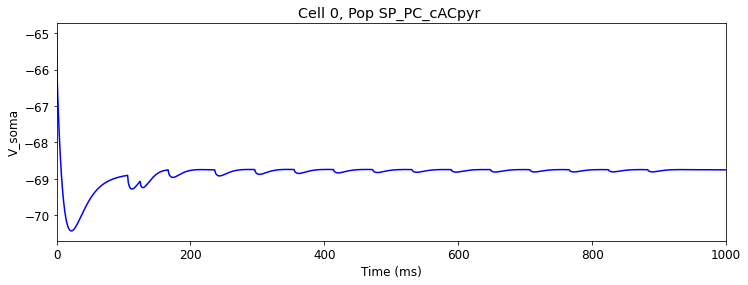

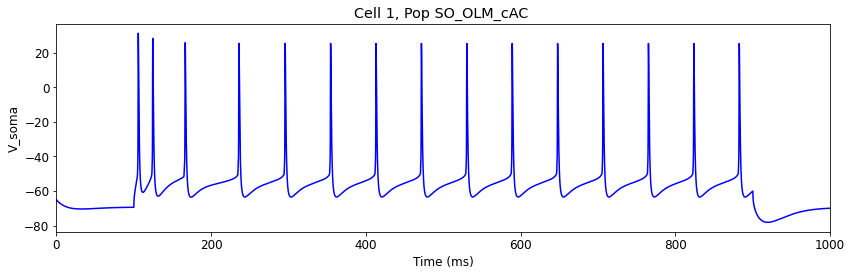

  Done; plotting time = 0.74 s

Total time = 808.16 s

End time:  2021-09-15 14:22:54.884569


In [ ]:
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

Plotting connectivity matrix...


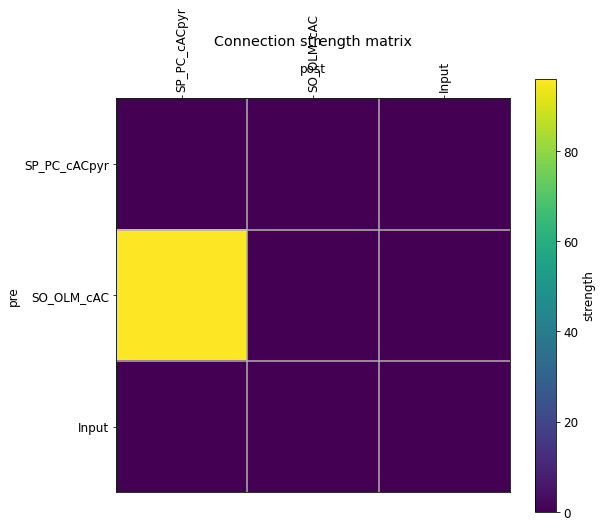

(<Figure size 576x576 with 2 Axes>, {'connMatrix': array([[ 0.,  0., -0.],
         [96.,  0., -0.],
         [ 0.,  0.,  0.]]),
  'feature': 'strength',
  'groupBy': 'pop',
  'includePost': ['all'],
  'includePre': ['all']})

In [ ]:
sim.analysis.plotConn(graphType='matrix', saveFig=True)

Plotting 2D representation of network cell locations and connections...


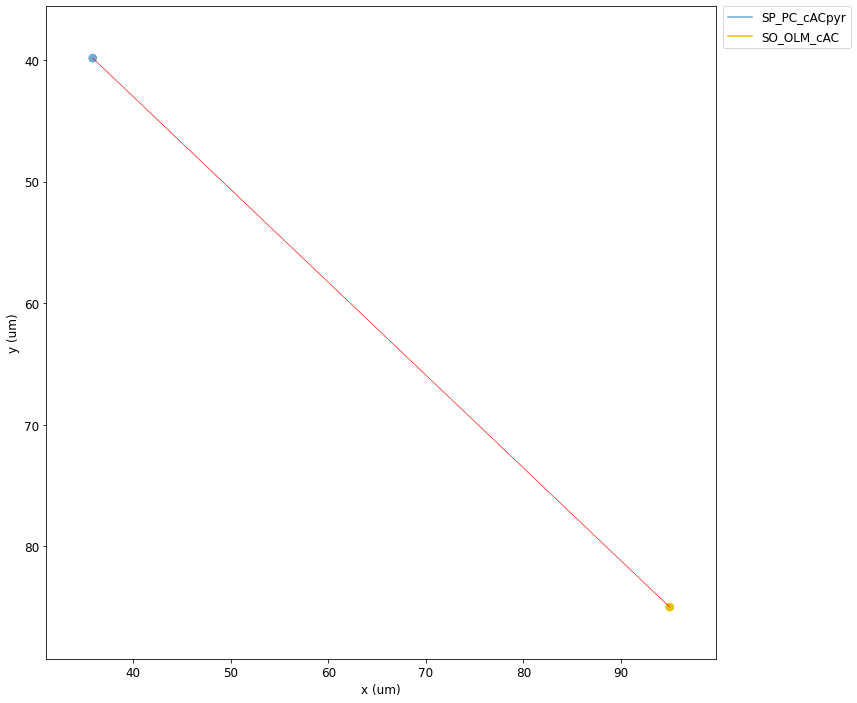

(<Figure size 864x864 with 1 Axes>,
 {'include': ['allCells'],
  'posX': [35.83531143706401, 95.00422943499773],
  'posXpost': 35.83531143706401,
  'posXpre': 95.00422943499773,
  'posY': [39.84944342173416, 84.98437598231612],
  'posYpost': 39.84944342173416,
  'posYpre': 84.98437598231612})

In [ ]:
sim.analysis.plot2Dnet(showConns=True, saveFig=True)